In [3]:
%matplotlib inline

In [4]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt

In [14]:
def do_the_plots(pred_month):
    rnn = xr.open_dataset(f'data/models/rnn/preds_2018_{pred_month}.nc')
    nn = xr.open_dataset(f'data/models/linear_network/preds_2018_{pred_month}.nc')
    parsimonious = xr.open_dataset(f'data/models/previous_month/preds_2018_{pred_month}.nc')
    true = xr.open_dataset(f'data/features/test/2018_{pred_month}/y.nc').rename({'VHI': 'preds'}).isel(time=0)
    
    p_err = (parsimonious - true).preds.values
    p_err = p_err[~np.isnan(p_err)]
    p_err = np.sqrt(p_err ** 2).mean()

    nn_err = (nn - true).preds.values
    nn_err = nn_err[~np.isnan(nn_err)]
    nn_err = np.sqrt(nn_err ** 2).mean()
 
    rnn_err = (rnn - true).preds.values
    rnn_err = rnn_err[~np.isnan(rnn_err)]
    rnn_err = np.sqrt(rnn_err ** 2).mean()
    
    print(f'For month {pred_month}, parsimonious error: {p_err}, linear net error: {nn_err}, rnn error: {rnn_err}')
    
    fig, ax = plt.subplots(1, 1, figsize=(7, 5))
    true.preds.plot.hist(ax=ax, label='true', histtype='stepfilled', color='r', alpha=0.3)
    nn.preds.plot.hist(ax=ax, label='nn', histtype='step', color='blue')
    rnn.preds.plot.hist(ax=ax, label='rnn', histtype='step', color='black')
    fig.legend()
    plt.show()
    
    plt.clf()
    
    fig, ax = plt.subplots(1, 4, figsize=(15, 3))
    true.preds.plot(vmin=0, vmax=100, ax=ax[0], add_colorbar=False)
    ax[0].set_title('True')
    parsimonious.preds.plot(vmin=0, vmax=100, ax=ax[1], add_colorbar=False)
    ax[1].set_title('Persistence')
    nn.preds.plot(vmin=0, vmax=100, ax=ax[2], add_colorbar=False)
    ax[2].set_title('Linear network')
    rnn.preds.plot(vmin=0, vmax=100, ax=ax[3], add_colorbar=False)
    ax[3].set_title('RNN')
    plt.show()

For month 1, parsimonious error: 8.706894674277503, linear net error: 8.360204946837003, rnn error: 7.307282583443793


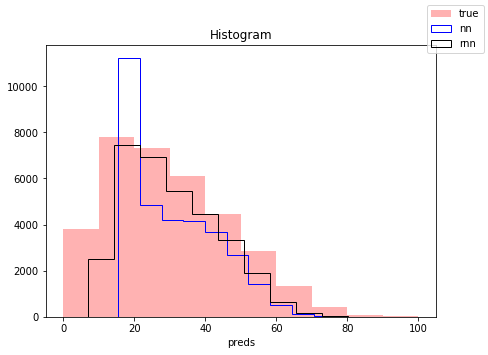

<Figure size 432x288 with 0 Axes>

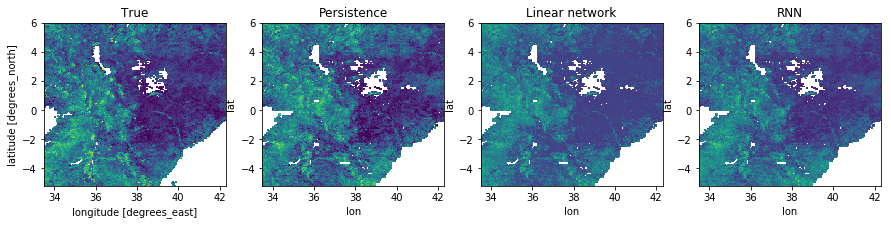

For month 2, parsimonious error: 10.554117123543069, linear net error: 8.05390411844516, rnn error: 9.695216771971285


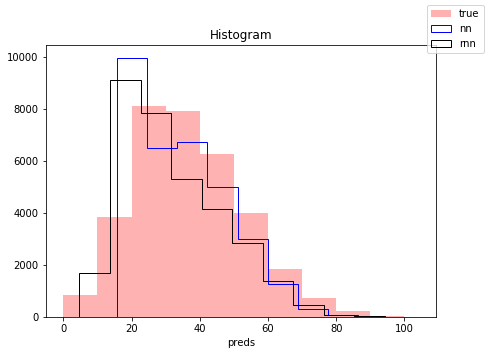

<Figure size 432x288 with 0 Axes>

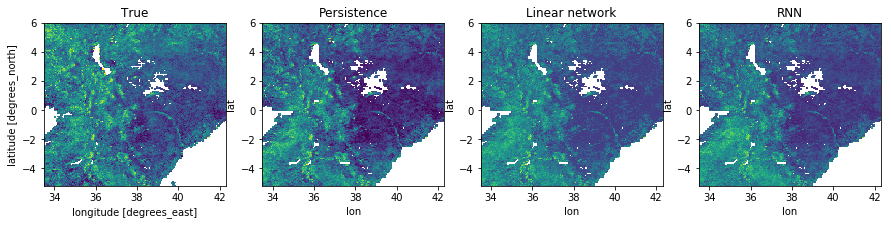

For month 3, parsimonious error: 18.100010155055212, linear net error: 12.496220954986267, rnn error: 17.196504372494164


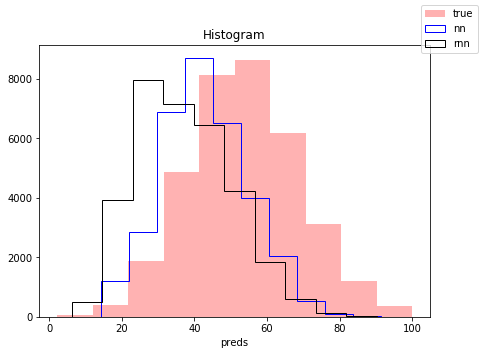

<Figure size 432x288 with 0 Axes>

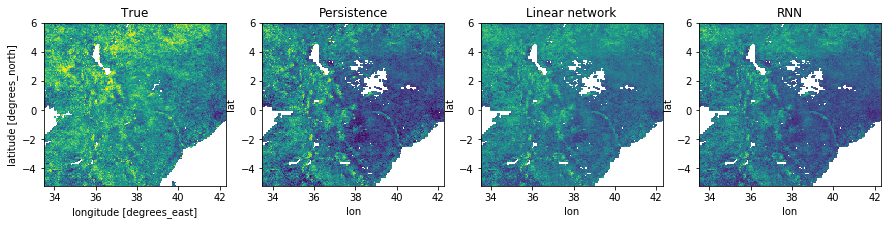

For month 4, parsimonious error: 15.534976936327567, linear net error: 11.494324635776353, rnn error: 12.185604040974876


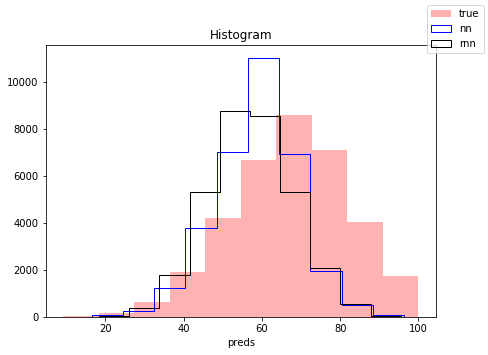

<Figure size 432x288 with 0 Axes>

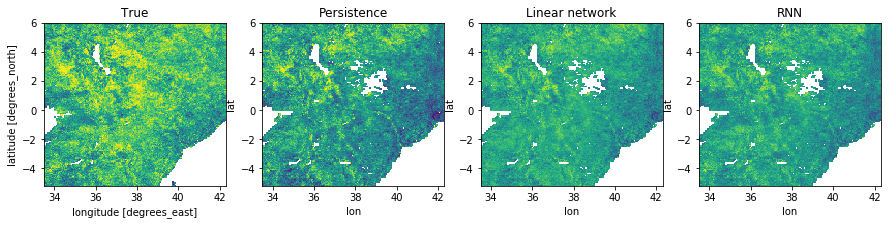

For month 5, parsimonious error: 9.202520535595223, linear net error: 9.59617430996965, rnn error: 9.85096838435482


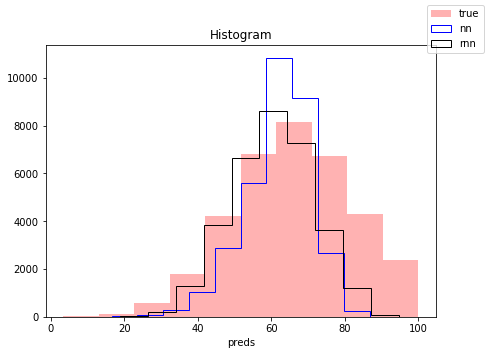

<Figure size 432x288 with 0 Axes>

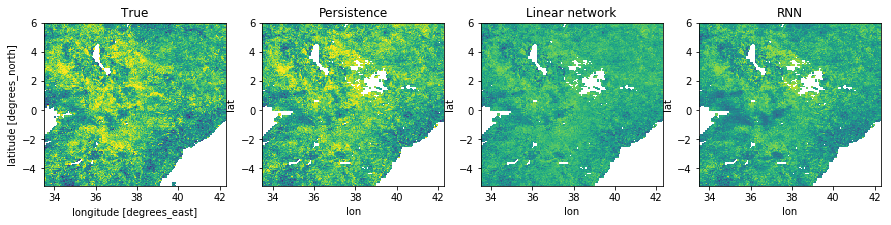

For month 6, parsimonious error: 9.424000468488321, linear net error: 8.518115441142974, rnn error: 7.5955231647511905


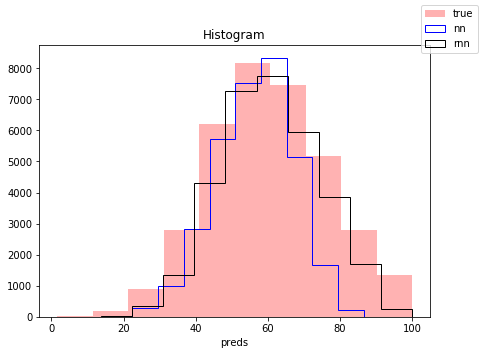

<Figure size 432x288 with 0 Axes>

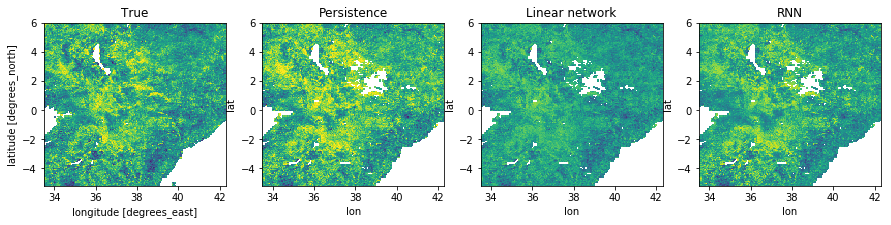

For month 7, parsimonious error: 9.495709830120427, linear net error: 8.753070455143412, rnn error: 8.644584675667021


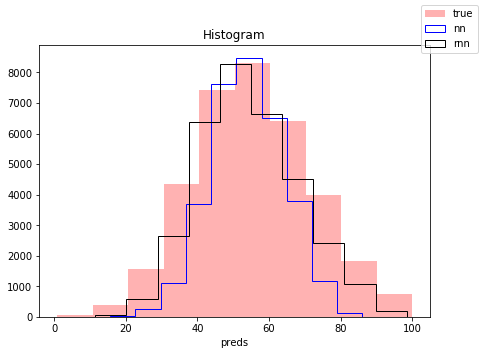

<Figure size 432x288 with 0 Axes>

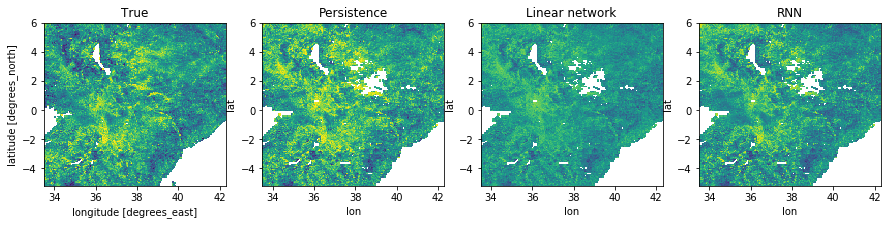

For month 8, parsimonious error: 8.83025866872518, linear net error: 8.82541071250141, rnn error: 8.408874069461488


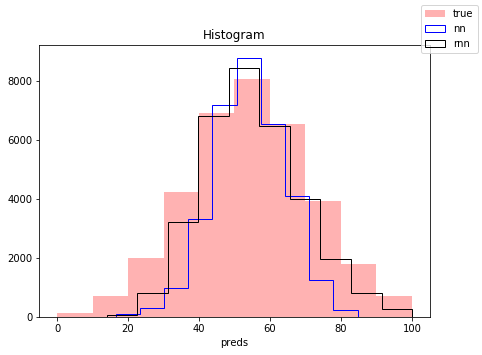

<Figure size 432x288 with 0 Axes>

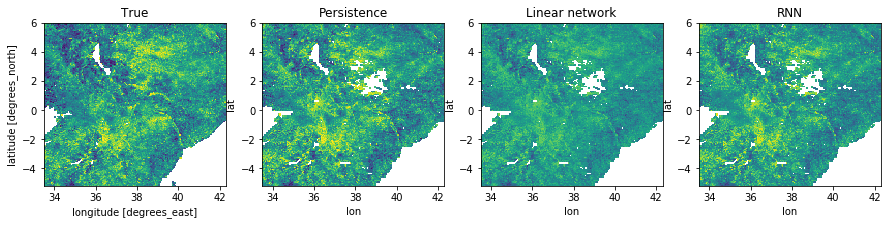

For month 9, parsimonious error: 8.323888489526434, linear net error: 9.028987399075096, rnn error: 8.400945817143336


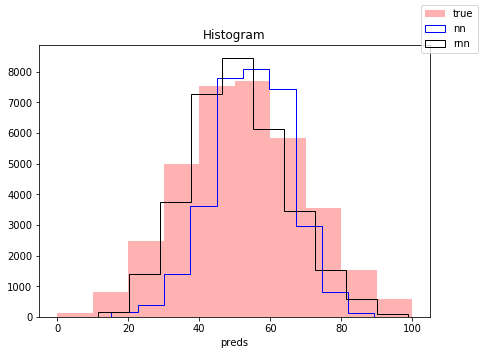

<Figure size 432x288 with 0 Axes>

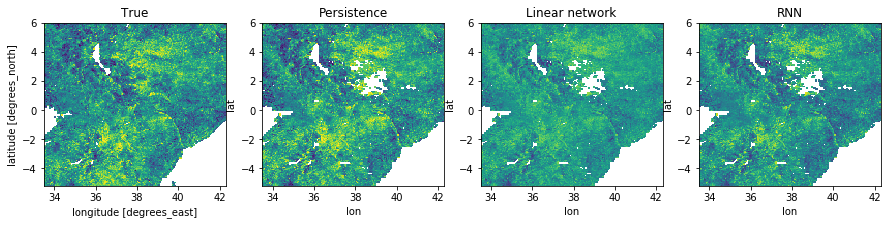

For month 10, parsimonious error: 11.453480168066724, linear net error: 10.31208467814506, rnn error: 8.057204015000632


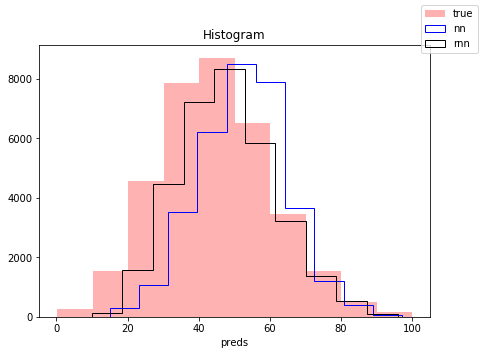

<Figure size 432x288 with 0 Axes>

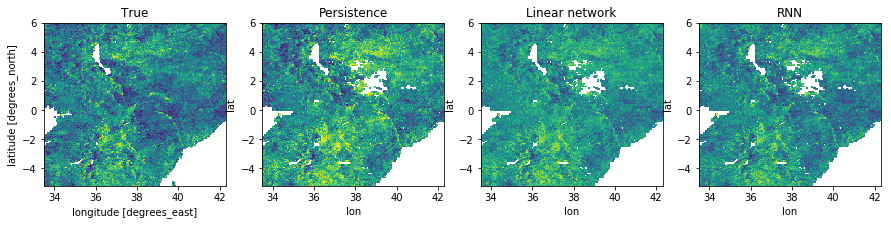

For month 11, parsimonious error: 10.298670093938956, linear net error: 8.305460182654617, rnn error: 7.681856195346718


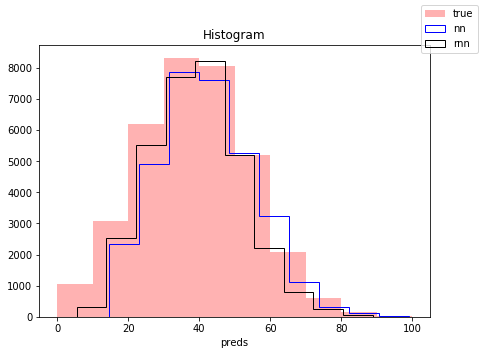

<Figure size 432x288 with 0 Axes>

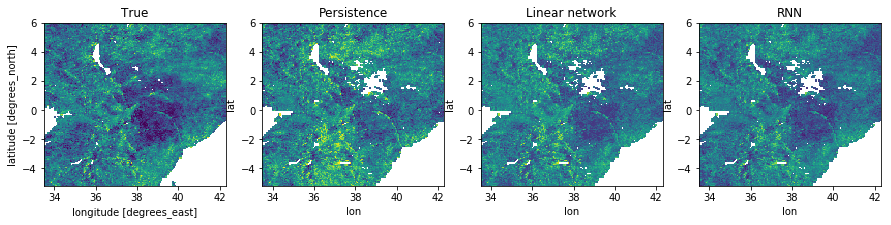

For month 12, parsimonious error: 8.737735137707846, linear net error: 7.4106680714792486, rnn error: 6.899378770452162


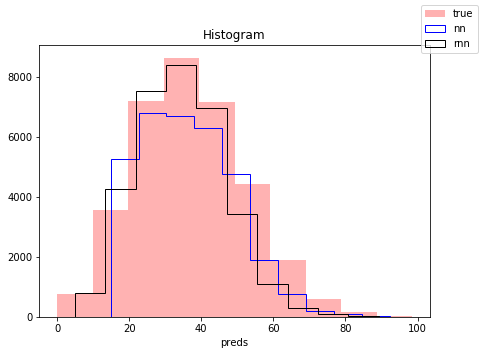

<Figure size 432x288 with 0 Axes>

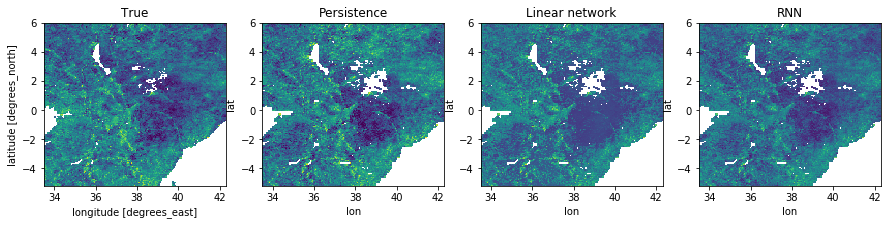

In [15]:
for i in range(1, 13):
    do_the_plots(i)